Calcular os angulos Theta com a função single axis (algoritmo astronômico)

In [29]:
import pandas as pd
from pvlib import solarposition, tracking, solarposition
import numpy as np
import matplotlib.pyplot as plt
import pvlib

Calcula tudo em datetime utc e depois plota em datetime local

In [30]:
data = pd.read_csv('8966199_-23.56_-46.63_2019.csv', header=2)
data['datetime'] = pd.to_datetime(data[['Year','Month', 'Day', 'Hour', 'Minute']])
data['datetime_utc'] = data['datetime'].dt.tz_localize('UTC')
data['datetime_local'] = data['datetime_utc'].dt.tz_convert('America/Sao_Paulo') # Fuso -2 até 16/02 (fim do horário de verão)
data['datetime_local'] = pd.to_datetime(data['datetime_local'])
display(data)


'''
# Localize em America/São Paulo e convert em UTC
data = pd.read_csv('8966199_-23.56_-46.63_2019.csv', header=2)
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
ambiguous_flags = [True if x < pd.Timestamp('2019-02-16 23:00:00') else False for x in data['datetime']]
data['datetime_local'] = data['datetime'].dt.tz_localize('America/Sao_Paulo', ambiguous=ambiguous_flags)
data['datetime_utc'] = data['datetime_local'].dt.tz_convert('UTC')
display(data)
'''


,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Solar Zenith Angle,Wind Speed,Temperature,datetime,datetime_utc,datetime_local
0,2019,1,1,0,0,0,0,0,114.47,2.9,21.5,2019-01-01 00:00:00,2019-01-01 00:00:00+00:00,2018-12-31 22:00:00-02:00
1,2019,1,1,0,30,0,0,0,119.37,2.8,21.4,2019-01-01 00:30:00,2019-01-01 00:30:00+00:00,2018-12-31 22:30:00-02:00
2,2019,1,1,1,0,0,0,0,123.75,2.8,21.3,2019-01-01 01:00:00,2019-01-01 01:00:00+00:00,2018-12-31 23:00:00-02:00
3,2019,1,1,1,30,0,0,0,127.48,2.7,21.2,2019-01-01 01:30:00,2019-01-01 01:30:00+00:00,2018-12-31 23:30:00-02:00
4,2019,1,1,2,0,0,0,0,130.42,2.7,21.1,2019-01-01 02:00:00,2019-01-01 02:00:00+00:00,2019-01-01 00:00:00-02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,32,151,45,85.18,2.8,24.4,2019-12-31 21:30:00,2019-12-31 21:30:00+00:00,2019-12-31 18:30:00-03:00
17516,2019,12,31,22,0,0,0,0,91.58,3.0,23.3,2019-12-31 22:00:00,2019-12-31 22:00:00+00:00,2019-12-31 19:00:00-03:00
17517,2019,12,31,22,30,0,0,0,97.66,3.0,22.6,2019-12-31 22:30:00,2019-12-31 22:30:00+00:00,2019-12-31 19:30:00-03:00
17518,2019,12,31,23,0,0,0,0,103.55,3.0,22.0,2019-12-31 23:00:00,2019-12-31 23:00:00+00:00,2019-12-31 20:00:00-03:00


"\n# Localize em America/São Paulo e convert em UTC\ndata = pd.read_csv('8966199_-23.56_-46.63_2019.csv', header=2)\ndata['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])\nambiguous_flags = [True if x < pd.Timestamp('2019-02-16 23:00:00') else False for x in data['datetime']]\ndata['datetime_local'] = data['datetime'].dt.tz_localize('America/Sao_Paulo', ambiguous=ambiguous_flags)\ndata['datetime_utc'] = data['datetime_local'].dt.tz_convert('UTC')\ndisplay(data)\n"

In [31]:
data.to_csv('data.csv')

In [33]:
# Dados fixos de Ribeirão
latitude = -23.55052
longitude = -46.633308
altitude = 590
albedo = 0.08 

In [34]:
solpos = solarposition.get_solarposition(data['datetime_utc'], latitude, longitude) 
# Retorna os dados em utc
display(solpos)

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
datetime_utc,,,,,,
2019-01-01 00:00:00+00:00,114.476095,114.476095,-24.476095,-24.476095,228.129189,-3.195874
2019-01-01 00:30:00+00:00,119.374683,119.374683,-29.374683,-29.374683,222.677718,-3.205782
2019-01-01 01:00:00+00:00,123.756554,123.756554,-33.756554,-33.756554,216.419942,-3.215687
2019-01-01 01:30:00+00:00,127.491193,127.491193,-37.491193,-37.491193,209.279223,-3.225590
2019-01-01 02:00:00+00:00,130.431269,130.431269,-40.431269,-40.431269,201.247715,-3.235491
...,...,...,...,...,...,...
2019-12-31 21:30:00+00:00,85.161122,85.330101,4.838878,4.669899,246.845935,-3.032026
2019-12-31 22:00:00+00:00,91.579861,91.579861,-1.579861,-1.579861,243.925505,-3.041970
2019-12-31 22:30:00+00:00,97.666672,97.666672,-7.666672,-7.666672,240.669099,-3.051912


In [35]:
solpos.to_csv('solarposition.csv')

In [36]:
# Cálculo do angulo theta
gcr = 0.35 

backtracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=55, 
    backtrack=True,
    gcr=gcr)

backtracking_position = backtracking_angles['tracker_theta'].fillna(0) # Preenche as colunas NaN com 0
backtracking_position = pd.DataFrame(backtracking_position)
display(backtracking_position)
'''
fig, ax = plt.subplots()
backtracking_position.plot(title='Backtracking Curve',
                            label=f'GCR:{gcr:0.01f}',
                            ax=ax)
plt.grid()
plt.legend()
plt.show()
'''

,tracker_theta
datetime_utc,
2019-01-01 00:00:00+00:00,0.000000
2019-01-01 00:30:00+00:00,0.000000
2019-01-01 01:00:00+00:00,0.000000
2019-01-01 01:30:00+00:00,0.000000
2019-01-01 02:00:00+00:00,0.000000
...,...
2019-12-31 21:30:00+00:00,9.925587
2019-12-31 22:00:00+00:00,0.000000
2019-12-31 22:30:00+00:00,0.000000


"\nfig, ax = plt.subplots()\nbacktracking_position.plot(title='Backtracking Curve',\n                            label=f'GCR:{gcr:0.01f}',\n                            ax=ax)\nplt.grid()\nplt.legend()\nplt.show()\n"

In [37]:
backtracking_position = backtracking_position.reset_index()
display(backtracking_position)

,datetime_utc,tracker_theta
0,2019-01-01 00:00:00+00:00,0.000000
1,2019-01-01 00:30:00+00:00,0.000000
2,2019-01-01 01:00:00+00:00,0.000000
3,2019-01-01 01:30:00+00:00,0.000000
4,2019-01-01 02:00:00+00:00,0.000000
...,...,...
17515,2019-12-31 21:30:00+00:00,9.925587
17516,2019-12-31 22:00:00+00:00,0.000000
17517,2019-12-31 22:30:00+00:00,0.000000
17518,2019-12-31 23:00:00+00:00,0.000000


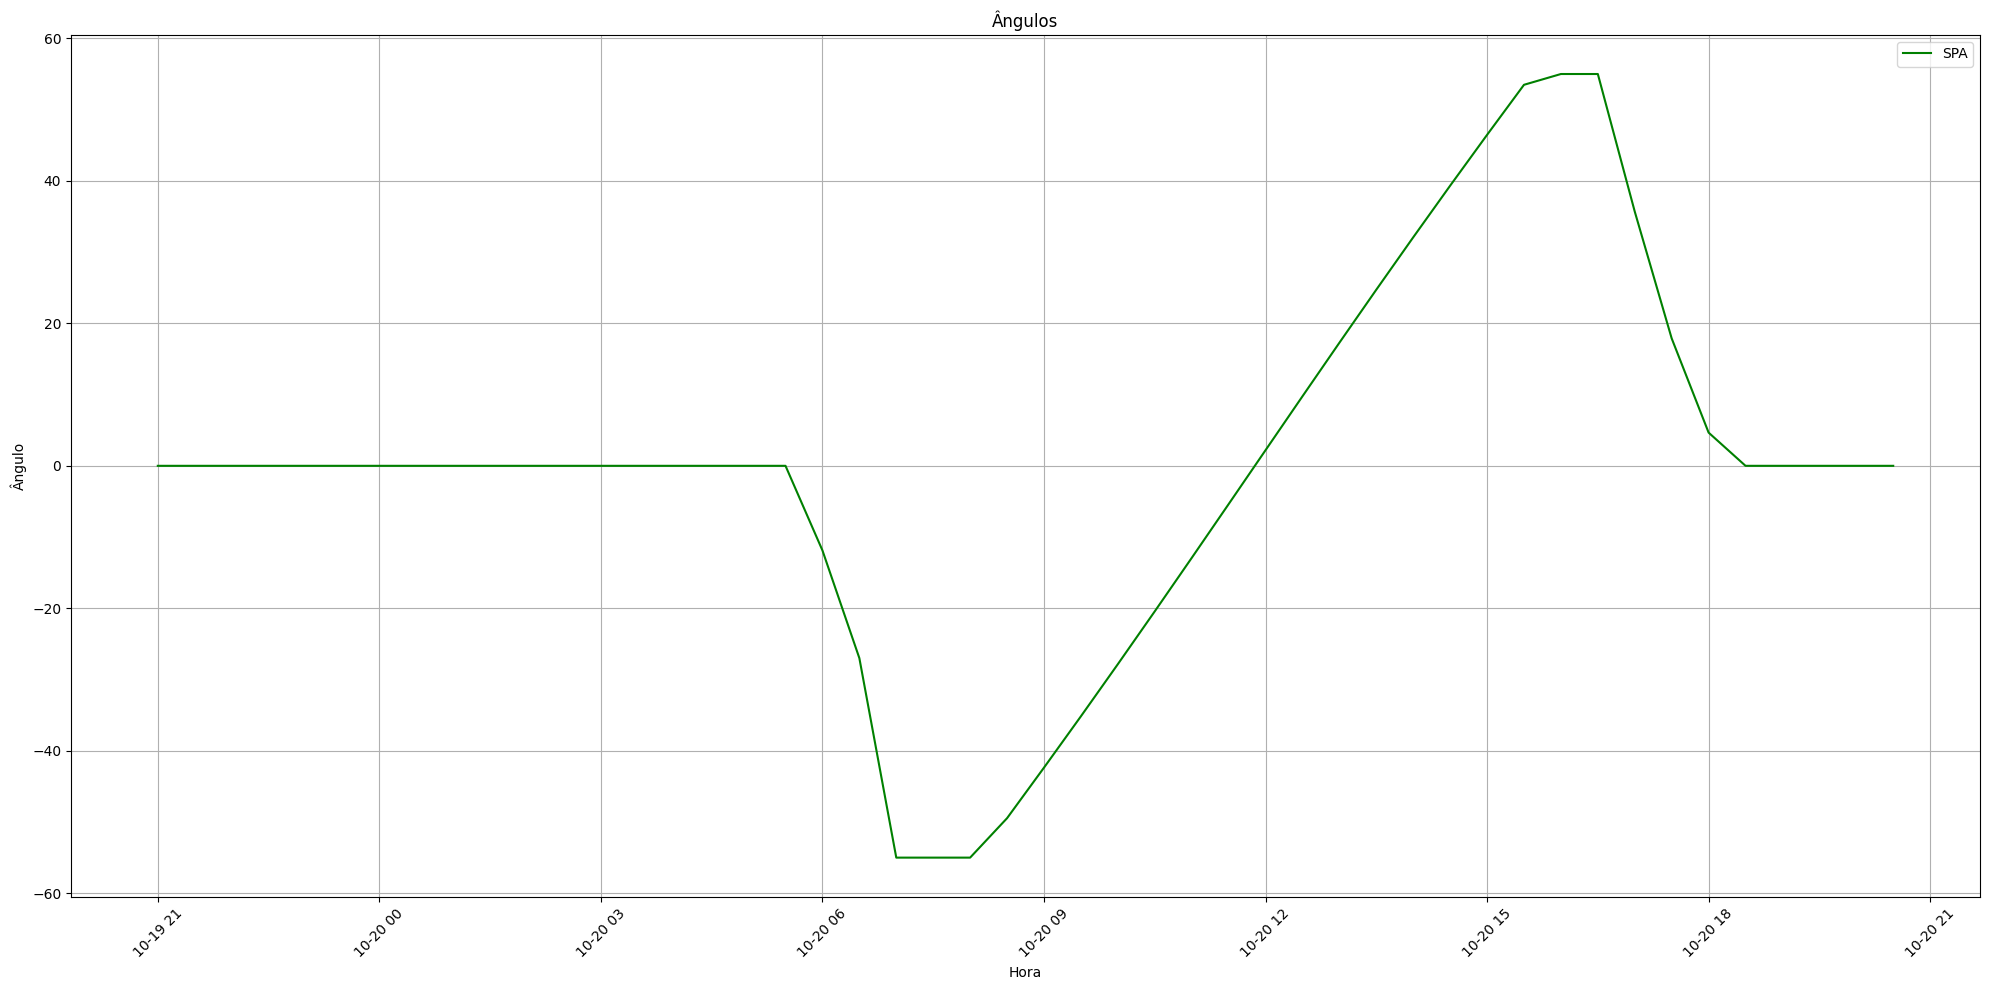

In [38]:
import matplotlib.dates as mdates

# Selecione o intervalo de datetime correspondente aos índices desejados
datetime_selecionados = data['datetime_local'][14016:14064]  
angulos = backtracking_position['tracker_theta'][14016:14064]


plt.figure(figsize=(20, 10))

plt.plot(datetime_selecionados, angulos, label='SPA', color='green')


# Adiciona título e legendas
plt.title('Ângulos')
plt.xlabel('Hora')
plt.ylabel('Ângulo')
plt.legend()
plt.grid(True)  # Adiciona uma grade para facilitar a visualização
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [39]:
backtracking_position.to_csv("backtracking.csv")

Cálculo do ângulo ótimo com a função getsolarposition 

In [40]:
df = pd.read_csv('8966199_-23.56_-46.63_2019.csv', header=2)

df['datetime'] = pd.to_datetime(df[['Year','Month', 'Day', 'Hour', 'Minute']])
df['datetime_utc'] = df['datetime'].dt.tz_localize('UTC')
#df['datetime_local'] = df['datetime_utc'].dt.tz_convert('America/Sao_Paulo') 
display(df)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Solar Zenith Angle,Wind Speed,Temperature,datetime,datetime_utc
0,2019,1,1,0,0,0,0,0,114.47,2.9,21.5,2019-01-01 00:00:00,2019-01-01 00:00:00+00:00
1,2019,1,1,0,30,0,0,0,119.37,2.8,21.4,2019-01-01 00:30:00,2019-01-01 00:30:00+00:00
2,2019,1,1,1,0,0,0,0,123.75,2.8,21.3,2019-01-01 01:00:00,2019-01-01 01:00:00+00:00
3,2019,1,1,1,30,0,0,0,127.48,2.7,21.2,2019-01-01 01:30:00,2019-01-01 01:30:00+00:00
4,2019,1,1,2,0,0,0,0,130.42,2.7,21.1,2019-01-01 02:00:00,2019-01-01 02:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,32,151,45,85.18,2.8,24.4,2019-12-31 21:30:00,2019-12-31 21:30:00+00:00
17516,2019,12,31,22,0,0,0,0,91.58,3.0,23.3,2019-12-31 22:00:00,2019-12-31 22:00:00+00:00
17517,2019,12,31,22,30,0,0,0,97.66,3.0,22.6,2019-12-31 22:30:00,2019-12-31 22:30:00+00:00
17518,2019,12,31,23,0,0,0,0,103.55,3.0,22.0,2019-12-31 23:00:00,2019-12-31 23:00:00+00:00


In [41]:
angles = np.arange(-55, 56, 1)
latitude = -23.55052
longitude = -46.633308
altitude = 590
albedo = 0.08

In [42]:
def calculate_irradiance(row, angle, latitude, longitude):
    solar_position = pvlib.solarposition.get_solarposition(row['datetime_utc'], latitude, longitude)
    dni_extra = pvlib.irradiance.get_extra_radiation(row['datetime_utc'])

    poa_components = pvlib.irradiance.get_total_irradiance(
        surface_tilt=angle,
        surface_azimuth=90,
        dni=row['DNI'],
        ghi=row['GHI'],
        dhi=row['DHI'],
        solar_zenith=solar_position['zenith'],
        solar_azimuth=solar_position['azimuth'],
        dni_extra=dni_extra,
        airmass=pvlib.atmosphere.get_relative_airmass(solar_position['zenith']),
        albedo=albedo
    )

    total_irrad = poa_components['poa_global']
    return total_irrad

In [43]:
optimal_angles = []
max_irradiances = []

for i, row in df.iterrows():
    row_irradiances = []
    current_time = row['datetime_utc']
    current_time_index = pd.DatetimeIndex([current_time])
  

    sun_times = pvlib.solarposition.sun_rise_set_transit_spa(current_time_index, latitude, longitude, how='numpy')

    sunrise = sun_times['sunrise'].iloc[0]
    sunset = sun_times['sunset'].iloc[0]

    if current_time < sunrise or current_time > sunset:
      optimal_angles.append(15)
      max_irradiances.append(0)
    else:
      for angle in angles:
          irradiance = calculate_irradiance(row, angle, latitude, longitude)
          row_irradiances.append(irradiance)
      max_irradiance = np.max(row_irradiances)
      print("Iteração", i)
      optimal_angle = -angles[np.argmax(row_irradiances)] # angle do indice correspondente
      optimal_angles.append(optimal_angle)
      max_irradiances.append(max_irradiance)

Iteração 17
Iteração 18
Iteração 19
Iteração 20
Iteração 21
Iteração 22
Iteração 23
Iteração 24
Iteração 25
Iteração 26
Iteração 27
Iteração 28
Iteração 29
Iteração 30
Iteração 31
Iteração 32
Iteração 33
Iteração 34
Iteração 35
Iteração 36
Iteração 37
Iteração 38
Iteração 39
Iteração 40
Iteração 41
Iteração 42
Iteração 43
Iteração 65
Iteração 66
Iteração 67
Iteração 68
Iteração 69
Iteração 70
Iteração 71
Iteração 72
Iteração 73
Iteração 74
Iteração 75
Iteração 76
Iteração 77
Iteração 78
Iteração 79
Iteração 80
Iteração 81
Iteração 82
Iteração 83
Iteração 84
Iteração 85
Iteração 86
Iteração 87
Iteração 88
Iteração 89
Iteração 90
Iteração 91
Iteração 113
Iteração 114
Iteração 115
Iteração 116
Iteração 117
Iteração 118
Iteração 119
Iteração 120
Iteração 121
Iteração 122
Iteração 123
Iteração 124
Iteração 125
Iteração 126
Iteração 127
Iteração 128
Iteração 129
Iteração 130
Iteração 131
Iteração 132
Iteração 133
Iteração 134
Iteração 135
Iteração 136
Iteração 137
Iteração 138
Iteração 139
I

In [44]:
df['angulo_otimo'] = optimal_angles
df['irradiancia'] = max_irradiances

df.to_csv("otimo_2.csv", columns=['datetime', 'angulo_otimo', 'irradiancia'])